In [24]:
import emip_toolkit as EMTK
from IPython.display import Image
import correction
import random 
import numpy as np
import PIL
from matplotlib import pyplot as plt

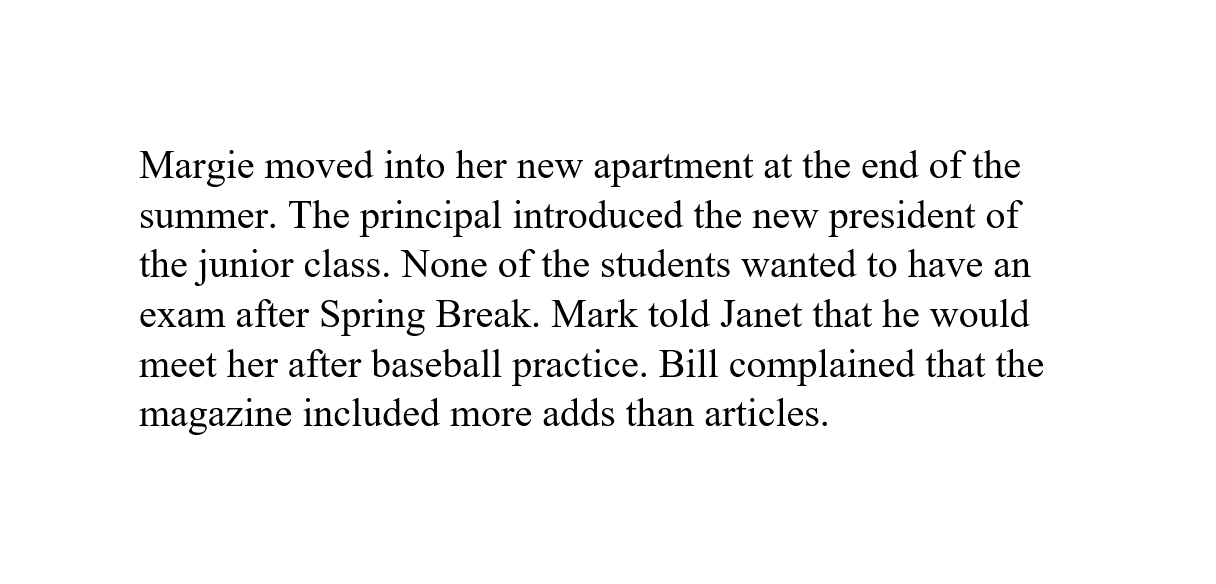

In [25]:
img = Image(filename= r'C:\Users\PC\Desktop\NN_with_Transfer_Learning\synthetic_text.png')
img

In [26]:
image_path = r'C:\Users\PC\Desktop\NN_with_Transfer_Learning'
image = "\synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_w

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,\synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,\synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,\synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,\synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,\synthetic_text.png


In [27]:
file_path = r'C:\Users\PC\Desktop\NN_with_Transfer_Learning'
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,\synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,\synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,\synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,\synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,\synthetic_text.png,new


In [28]:
line_ys = correction.find_lines_Y(aois_with_tokens)

In [29]:
x = 584
y = 1216
input_x = x//2
input_y = y//2
num_train = 200
num_test = 200

x_test = np.zeros((num_test, input_x, input_y, 3), dtype=np.uint16)
y_test = np.zeros(num_test, dtype=int)

error_types = [0, 1, 2, 3, 4]

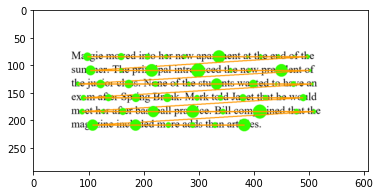

In [31]:
for error_type in error_types: 
    for j in range(0, 11): 
        for index in range(100):
          if error_type == 0: # noise
            synth_fixations = correction.generate_fixations_center(aois_with_tokens)
            error_trial = correction.error_noise(j/10, random.randint(0, 50), j/10, synth_fixations) 
          elif error_type == 1: # shift
            synth_fixations = correction.generate_fixations_center(aois_with_tokens)
            line_ys = np.array(synth_fixations)[:, 1]
            error_trial = correction.error_shift(j/10, line_ys, synth_fixations) 
    
          elif error_type == 2: # droop
            synth_fixations = correction.generate_fixations_center(aois_with_tokens)
            error_trial = correction.error_droop(j, synth_fixations)  
      
          elif error_type == 3: # offset 
            synth_fixations = correction.generate_fixations_center(aois_with_tokens)
            error_trial = correction.error_offset(j, j, synth_fixations)  
  
          elif error_type == 4: # no error
            error_trial = correction.generate_fixations_center(aois_with_tokens)
          
          else: # wrong entry
            print("Error: wrong entry")
            break
              
          y_test[index] = error_type
          im = correction.fix_to_img('synthetic_text.png', error_trial)
          im_small = im.resize((input_y, input_x)) # shrink image to fit in model, shape defined in prev cell
          im_small_array = np.asarray(im_small)
          x_test[index] = im_small_array
          plt.imshow(x_test[index])


np.save("data/x_increasing_test.npy", x_test)
np.save("data/y_increasing_test.npy", y_test)